# 因果探索アルゴリズムの評価分析

PC アルゴリズムと DirectLiNGAM による因果構造推定の結果を、真の DAG と比較して評価する。

## 評価指標
- **スケルトン比較**: 方向を無視したエッジの一致度（Precision / Recall / F1）
- **方向の正解率**: 有向エッジの方向が真の DAG と一致しているか
- **Y の直接原因の特定精度**: 目的変数 Y に直接影響する変数を正しく特定できたか
- **ノイズ変数の除外**: 因果効果を持たない変数 (N1, N2, N3) を正しく除外できたか

## 1. 準備（データ読み込み・アルゴリズム実行）

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from causallearn.search.ConstraintBased.PC import pc
import lingam
from generate_dataset import DIRECT_CAUSES_OF_Y, NOISE_FEATURES

# --- データ読み込み ---
df = pd.read_csv("dataset.csv")
data = df.values
column_names = list(df.columns)
n = len(column_names)

# --- PC アルゴリズム (単一実行) ---
cg = pc(data=data, alpha=0.05, indep_test="fisherz", node_names=column_names)
adj_matrix = cg.G.graph

# --- PC ブートストラップ ---
n_bootstrap = 100
THRESHOLD = 0.50

pc_edge_counts = np.zeros((n, n))
np.random.seed(42)
for b in range(n_bootstrap):
    idx = np.random.choice(len(data), size=len(data), replace=True)
    boot_data = data[idx]
    cg_b = pc(data=boot_data, alpha=0.05, indep_test="fisherz", node_names=column_names)
    adj_b = cg_b.G.graph
    for i in range(n):
        for j in range(n):
            if adj_b[i, j] != 0:
                pc_edge_counts[i, j] += 1
pc_probs = pc_edge_counts / n_bootstrap

# --- DirectLiNGAM ---
lingam_model = lingam.DirectLiNGAM()
lingam_model.fit(data)
B = lingam_model.adjacency_matrix_

# --- LiNGAM ブートストラップ ---
bs_result = lingam_model.bootstrap(data, n_sampling=n_bootstrap)
lingam_probs = bs_result.get_probabilities(min_causal_effect=0.01)

print(f"データ形状: {df.shape}")
print(f"ブートストラップ回数: {n_bootstrap} (PC / LiNGAM 共通)")
print(f"エッジ採用閾値: 出現確率 >= {THRESHOLD}")
print("PC / LiNGAM 実行完了")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

データ形状: (2000, 20)
ブートストラップ回数: 100 (PC / LiNGAM 共通)
エッジ採用閾値: 出現確率 >= 0.5
PC / LiNGAM 実行完了


## 2. 真の DAG の定義

In [2]:
# 真の DAG (generate_dataset.py の DGP に基づく)
true_edges = {
    ("W1", "Z1"),
    ("W2", "Z2"),
    ("Z1", "X"), ("Z1", "Y"), ("Z1", "N1"),
    ("Z2", "X"), ("Z2", "Y"),
    ("Z3", "M"), ("Z3", "Y"),
    ("IV", "X"), ("IV2", "X"),
    ("X", "M"), ("X", "M2"), ("X", "Y"), ("X", "N4"),
    ("M", "Y"), ("M", "N5"),
    ("M2", "Y"),
    ("P1", "M"),
    ("D1", "Y"), ("D1", "N7"),
}
true_skeleton = {frozenset(e) for e in true_edges}
true_direct_causes = set(DIRECT_CAUSES_OF_Y)

print(f"真のエッジ数:      {len(true_edges)}")
print(f"真のエッジ:        {sorted(true_edges)}")
print(f"真の Y の直接原因: {sorted(true_direct_causes)}")
print(f"ノイズ変数:        {sorted(NOISE_FEATURES)}")

真のエッジ数:      21
真のエッジ:        [('D1', 'N7'), ('D1', 'Y'), ('IV', 'X'), ('IV2', 'X'), ('M', 'N5'), ('M', 'Y'), ('M2', 'Y'), ('P1', 'M'), ('W1', 'Z1'), ('W2', 'Z2'), ('X', 'M'), ('X', 'M2'), ('X', 'N4'), ('X', 'Y'), ('Z1', 'N1'), ('Z1', 'X'), ('Z1', 'Y'), ('Z2', 'X'), ('Z2', 'Y'), ('Z3', 'M'), ('Z3', 'Y')]
真の Y の直接原因: ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
ノイズ変数:        ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7']


## 3. 推定エッジの抽出

In [3]:
# --- PC: ブートストラップベースのエッジ抽出 ---
pc_edges = []
for i in range(n):
    for j in range(i + 1, n):
        skeleton_prob = max(pc_probs[i, j], pc_probs[j, i])
        if skeleton_prob < THRESHOLD:
            continue
        if adj_matrix[i, j] == -1 and adj_matrix[j, i] == 1:
            kind, src, dst = "有向 (→)", column_names[i], column_names[j]
        elif adj_matrix[i, j] == 1 and adj_matrix[j, i] == -1:
            kind, src, dst = "有向 (→)", column_names[j], column_names[i]
        elif adj_matrix[i, j] == -1 and adj_matrix[j, i] == -1:
            kind, src, dst = "無向 (—)", column_names[i], column_names[j]
        else:
            # 単一実行ではエッジなしだがブートストラップで検出
            kind, src, dst = "無向 (—)", column_names[i], column_names[j]
        pc_edges.append({"From": src, "To": dst, "種別": kind, "出現確率": skeleton_prob})
pc_edges_df = pd.DataFrame(pc_edges)

# --- LiNGAM: ブートストラップベースのエッジ抽出 ---
lingam_edges = []
for i in range(n):
    for j in range(n):
        if i != j and lingam_probs[i, j] >= THRESHOLD:
            lingam_edges.append({
                "From": column_names[j], "To": column_names[i],
                "係数": B[i, j], "出現確率": lingam_probs[i, j],
            })
lingam_edges_df = pd.DataFrame(lingam_edges)

print(f"PC 検出エッジ数 (ブートストラップ): {len(pc_edges_df)}")
print(pc_edges_df.to_string(index=False))
print(f"\nLiNGAM 検出エッジ数 (ブートストラップ): {len(lingam_edges_df)}")
print(lingam_edges_df.to_string(index=False))

PC 検出エッジ数 (ブートストラップ): 19
From To     種別  出現確率
  W1 Z1 無向 (—)  1.00
  W2 Z2 無向 (—)  1.00
  Z1  X 有向 (→)  0.99
  Z1 N1 無向 (—)  1.00
  Z1  Y 有向 (→)  0.96
  Z2  X 有向 (→)  1.00
  Z3  M 有向 (→)  1.00
  IV  X 有向 (→)  1.00
 IV2  X 有向 (→)  1.00
   X M2 有向 (→)  1.00
   X N4 有向 (→)  1.00
   X  Y 有向 (→)  1.00
  P1  M 有向 (→)  1.00
   M N5 有向 (→)  1.00
   M  Y 有向 (→)  1.00
  M2  Y 有向 (→)  1.00
  P1  Y 有向 (→)  0.74
  D1 N7 無向 (—)  1.00
  D1  Y 有向 (→)  1.00

LiNGAM 検出エッジ数 (ブートストラップ): 34
From To        係数  出現確率
  W1 Z1  0.356566  0.63
  Z2 Z1  0.000000  0.60
  IV Z1 -0.263993  0.80
 IV2 Z1 -0.224798  0.81
  N1 Z1  0.404143  0.56
  W2 Z2  0.721214  1.00
  IV Z2 -0.270618  0.84
 IV2 Z2 -0.209088  0.78
  N7 Z2 -0.041178  0.56
  P1 Z3 -0.267970  0.53
  Z1  X  0.000000  0.55
  Z2  X  0.000000  0.63
  IV  X  0.715503  1.00
 IV2  X  0.579354  1.00
  M2  X  0.631172  0.83
  P1  X  0.000000  0.53
 IV2  M  0.000000  0.54
  M2  M  0.000000  0.58
  N5  M  0.000000  0.51
   Y  M  0.000000  0.51
  W2 M2  0.396952  0.

## 4. PC アルゴリズムの評価

### 4.1 スケルトン比較（方向無視）

In [4]:
# PC: 推定エッジを集合に変換
pc_directed = {(e["From"], e["To"]) for _, e in pc_edges_df.iterrows() if e["種別"] == "有向 (→)"}
pc_undirected = set()
for _, e in pc_edges_df.iterrows():
    if e["種別"] == "無向 (—)":
        pc_undirected.add((e["From"], e["To"]))
        pc_undirected.add((e["To"], e["From"]))

pc_skeleton = {frozenset([e["From"], e["To"]]) for _, e in pc_edges_df.iterrows()}

pc_correct_skeleton = true_skeleton & pc_skeleton
pc_missed = true_skeleton - pc_skeleton
pc_extra = pc_skeleton - true_skeleton

pc_prec = len(pc_correct_skeleton) / len(pc_skeleton) if pc_skeleton else 0
pc_rec = len(pc_correct_skeleton) / len(true_skeleton)
pc_f1 = 2 * pc_prec * pc_rec / (pc_prec + pc_rec) if (pc_prec + pc_rec) > 0 else 0

print("=== PC: スケルトン比較 ===")
print(f"真のエッジ数:     {len(true_skeleton)}")
print(f"推定エッジ数:     {len(pc_skeleton)}")
print(f"正解 (一致):      {len(pc_correct_skeleton)}")
print(f"見逃し (FN):      {len(pc_missed)}  {[set(e) for e in pc_missed]}")
print(f"余分 (FP):        {len(pc_extra)}  {[set(e) for e in pc_extra]}")
print(f"Precision:        {pc_prec:.4f}")
print(f"Recall:           {pc_rec:.4f}")
print(f"F1:               {pc_f1:.4f}")

=== PC: スケルトン比較 ===
真のエッジ数:     21
推定エッジ数:     19
正解 (一致):      18
見逃し (FN):      3  [{'X', 'M'}, {'Z3', 'Y'}, {'Y', 'Z2'}]
余分 (FP):        1  [{'Y', 'P1'}]
Precision:        0.9474
Recall:           0.8571
F1:               0.9000


### 4.2 有向エッジの方向の正解率

In [5]:
pc_correct_dir = true_edges & pc_directed
pc_reversed = {(b, a) for a, b in true_edges} & pc_directed
pc_true_but_undirected = {e for e in true_edges if e in pc_undirected or (e[1], e[0]) in pc_undirected}

print("=== PC: 有向エッジの方向 ===")
print(f"方向も正解:       {len(pc_correct_dir)}  {pc_correct_dir}")
print(f"方向が逆:         {len(pc_reversed)}  {pc_reversed}")
print(f"無向 (未確定):    {len(pc_true_but_undirected)}  {pc_true_but_undirected}")

=== PC: 有向エッジの方向 ===
方向も正解:       14  {('Z1', 'X'), ('Z2', 'X'), ('IV', 'X'), ('X', 'Y'), ('M', 'Y'), ('X', 'N4'), ('IV2', 'X'), ('P1', 'M'), ('Z1', 'Y'), ('D1', 'Y'), ('M', 'N5'), ('M2', 'Y'), ('Z3', 'M'), ('X', 'M2')}
方向が逆:         0  set()
無向 (未確定):    4  {('W1', 'Z1'), ('D1', 'N7'), ('Z1', 'N1'), ('W2', 'Z2')}


### 4.3 Y の直接原因の特定精度

In [6]:
# PC: ブートストラップで有意なエッジから Y に隣接するノードを抽出
pc_adjacent_to_y = set()
for _, e in pc_edges_df.iterrows():
    if e["From"] == "Y":
        pc_adjacent_to_y.add(e["To"])
    elif e["To"] == "Y":
        pc_adjacent_to_y.add(e["From"])

pc_tp = true_direct_causes & pc_adjacent_to_y
pc_fn = true_direct_causes - pc_adjacent_to_y
pc_fp = pc_adjacent_to_y - true_direct_causes

print("=== PC: Y の直接原因 ===")
print(f"真の直接原因:     {sorted(true_direct_causes)}")
print(f"推定 (隣接):      {sorted(pc_adjacent_to_y)}")
print(f"正解 (TP):        {sorted(pc_tp)}")
print(f"見逃し (FN):      {sorted(pc_fn)}")
print(f"誤検出 (FP):      {sorted(pc_fp)}")
print(f"ノイズ除外:       {len(set(NOISE_FEATURES) & pc_adjacent_to_y) == 0}")

=== PC: Y の直接原因 ===
真の直接原因:     ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
推定 (隣接):      ['D1', 'M', 'M2', 'P1', 'X', 'Z1']
正解 (TP):        ['D1', 'M', 'M2', 'X', 'Z1']
見逃し (FN):      ['Z2', 'Z3']
誤検出 (FP):      ['P1']
ノイズ除外:       True


## 5. DirectLiNGAM の評価

### 5.1 スケルトン比較（方向無視）

In [7]:
# LiNGAM: 推定エッジを集合に変換
lingam_estimated = {(e["From"], e["To"]) for _, e in lingam_edges_df.iterrows()}
lingam_skeleton = {frozenset(e) for e in lingam_estimated}

lingam_correct_skeleton = true_skeleton & lingam_skeleton
lingam_missed = true_skeleton - lingam_skeleton
lingam_extra = lingam_skeleton - true_skeleton

l_prec = len(lingam_correct_skeleton) / len(lingam_skeleton) if lingam_skeleton else 0
l_rec = len(lingam_correct_skeleton) / len(true_skeleton)
l_f1 = 2 * l_prec * l_rec / (l_prec + l_rec) if (l_prec + l_rec) > 0 else 0

print("=== LiNGAM: スケルトン比較 ===")
print(f"真のエッジ数:     {len(true_skeleton)}")
print(f"推定エッジ数:     {len(lingam_skeleton)}")
print(f"正解 (一致):      {len(lingam_correct_skeleton)}")
print(f"見逃し (FN):      {len(lingam_missed)}  {[set(e) for e in lingam_missed]}")
print(f"余分 (FP):        {len(lingam_extra)}  {[set(e) for e in lingam_extra]}")
print(f"Precision:        {l_prec:.4f}")
print(f"Recall:           {l_rec:.4f}")
print(f"F1:               {l_f1:.4f}")

=== LiNGAM: スケルトン比較 ===
真のエッジ数:     21
推定エッジ数:     34
正解 (一致):      19
見逃し (FN):      2  [{'X', 'M'}, {'Z3', 'M'}]
余分 (FP):        15  [{'IV', 'Z2'}, {'Y', 'IV2'}, {'IV2', 'M'}, {'IV', 'Z1'}, {'IV2', 'Z2'}, {'Y', 'IV'}, {'Z3', 'P1'}, {'M2', 'IV2'}, {'M2', 'W2'}, {'M2', 'IV'}, {'IV2', 'Z1'}, {'Z1', 'Z2'}, {'M2', 'M'}, {'P1', 'X'}, {'N7', 'Z2'}]
Precision:        0.5588
Recall:           0.9048
F1:               0.6909


### 5.2 有向エッジの方向の正解率

In [8]:
lingam_correct_dir = true_edges & lingam_estimated
lingam_reversed = {(b, a) for a, b in true_edges} & lingam_estimated

print("=== LiNGAM: 有向エッジの方向 ===")
print(f"方向も正解:       {len(lingam_correct_dir)}  {lingam_correct_dir}")
print(f"方向が逆:         {len(lingam_reversed)}  {lingam_reversed}")

=== LiNGAM: 有向エッジの方向 ===
方向も正解:       13  {('Z2', 'X'), ('Z1', 'X'), ('Z1', 'Y'), ('IV', 'X'), ('X', 'Y'), ('Z3', 'Y'), ('X', 'N4'), ('IV2', 'X'), ('Z2', 'Y'), ('D1', 'Y'), ('W1', 'Z1'), ('M2', 'Y'), ('W2', 'Z2')}
方向が逆:         6  {('M', 'P1'), ('N7', 'D1'), ('N5', 'M'), ('M2', 'X'), ('N1', 'Z1'), ('Y', 'M')}


### 5.3 Y の直接原因の特定精度

In [9]:
# LiNGAM: スケルトンベースで Y に隣接するノードを抽出（PC と統一）
lingam_adjacent_to_y = set()
for _, e in lingam_edges_df.iterrows():
    if e["From"] == "Y":
        lingam_adjacent_to_y.add(e["To"])
    elif e["To"] == "Y":
        lingam_adjacent_to_y.add(e["From"])

lingam_tp = true_direct_causes & lingam_adjacent_to_y
lingam_fn = true_direct_causes - lingam_adjacent_to_y
lingam_fp = lingam_adjacent_to_y - true_direct_causes

print("=== LiNGAM: Y の直接原因 (スケルトン) ===")
print(f"真の直接原因:     {sorted(true_direct_causes)}")
print(f"推定 (隣接):      {sorted(lingam_adjacent_to_y)}")
print(f"正解 (TP):        {sorted(lingam_tp)}")
print(f"見逃し (FN):      {sorted(lingam_fn)}")
print(f"誤検出 (FP):      {sorted(lingam_fp)}")
print(f"ノイズ除外:       {len(set(NOISE_FEATURES) & lingam_adjacent_to_y) == 0}")

=== LiNGAM: Y の直接原因 (スケルトン) ===
真の直接原因:     ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
推定 (隣接):      ['D1', 'IV', 'IV2', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
正解 (TP):        ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
見逃し (FN):      []
誤検出 (FP):      ['IV', 'IV2']
ノイズ除外:       True


## 6. PC vs LiNGAM 総合比較

In [10]:
comparison = pd.DataFrame({
    "指標": [
        "検出エッジ数",
        "スケルトン Precision",
        "スケルトン Recall",
        "スケルトン F1",
        "方向正解数",
        "方向逆転数",
        "Y の直接原因 TP",
        "Y の直接原因 FN",
        "Y の直接原因 FP",
        "ノイズ除外",
    ],
    "PC": [
        len(pc_edges_df),
        f"{pc_prec:.4f}",
        f"{pc_rec:.4f}",
        f"{pc_f1:.4f}",
        len(pc_correct_dir),
        len(pc_reversed),
        len(pc_tp),
        len(pc_fn),
        len(pc_fp),
        len(set(NOISE_FEATURES) & pc_adjacent_to_y) == 0,
    ],
    "LiNGAM": [
        len(lingam_edges_df),
        f"{l_prec:.4f}",
        f"{l_rec:.4f}",
        f"{l_f1:.4f}",
        len(lingam_correct_dir),
        len(lingam_reversed),
        len(lingam_tp),
        len(lingam_fn),
        len(lingam_fp),
        len(set(NOISE_FEATURES) & lingam_adjacent_to_y) == 0,
    ],
})

print("=" * 60)
print("PC アルゴリズム vs DirectLiNGAM 比較")
print("=" * 60)
print(f"真のエッジ数: {len(true_skeleton)}")
print(f"真の Y の直接原因: {sorted(true_direct_causes)}")
print(f"ブートストラップ回数: {n_bootstrap} (PC / LiNGAM 共通)")
print(f"エッジ採用閾値: 出現確率 >= {THRESHOLD}")
print(f"Y の直接原因判定: スケルトン (隣接) ベース (PC / LiNGAM 共通)")
print()
print(comparison.to_string(index=False))
print()
print("注: DGP のノイズはガウス分布のため LiNGAM の仮定を満たさない。")
print("   実データでは分布に応じて手法を選択する必要がある。")

PC アルゴリズム vs DirectLiNGAM 比較
真のエッジ数: 21
真の Y の直接原因: ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3']
ブートストラップ回数: 100 (PC / LiNGAM 共通)
エッジ採用閾値: 出現確率 >= 0.5
Y の直接原因判定: スケルトン (隣接) ベース (PC / LiNGAM 共通)

             指標     PC LiNGAM
         検出エッジ数     19     34
スケルトン Precision 0.9474 0.5588
   スケルトン Recall 0.8571 0.9048
       スケルトン F1 0.9000 0.6909
          方向正解数     14     13
          方向逆転数      0      6
     Y の直接原因 TP      5      7
     Y の直接原因 FN      2      0
     Y の直接原因 FP      1      2
          ノイズ除外   True   True

注: DGP のノイズはガウス分布のため LiNGAM の仮定を満たさない。
   実データでは分布に応じて手法を選択する必要がある。


## 7. Random Forest による回帰精度の比較

因果探索で特定された Y の直接原因のみを説明変数とした場合と、全変数を説明変数とした場合で、Random Forest 回帰の推定精度を比較する。

### 比較条件
- **全変数モデル**: Z1, Z2, IV, X, M, N1, N2, N3 → Y
- **PC 因果モデル**: PC ブートストラップで Y にスケルトン上で隣接と判定された変数のみ → Y
- **LiNGAM 因果モデル**: LiNGAM ブートストラップで Y にスケルトン上で隣接と判定された変数のみ → Y
- **真の因果モデル (参考)**: 真の直接原因 (X, M, Z1, Z2) のみ → Y

### 評価指標
- R² スコア（決定係数）
- RMSE（二乗平均平方根誤差）
- 5-fold 交差検証

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from generate_dataset import ALL_FEATURES

y = df["Y"].values

# 各モデルの説明変数を定義（PC / LiNGAM ともにスケルトン隣接ベース）
feature_sets = {
    "全変数":          sorted(ALL_FEATURES),
    "PC 因果":         sorted(pc_adjacent_to_y),
    "LiNGAM 因果":    sorted(lingam_adjacent_to_y),
    "真の因果 (参考)": sorted(DIRECT_CAUSES_OF_Y),
}

print("=== 各モデルの説明変数 ===")
for name, feats in feature_sets.items():
    print(f"  {name:16s}: {feats} ({len(feats)} 変数)")

# 5-fold CV で評価
results = []
for name, feats in feature_sets.items():
    X = df[feats].values
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    cv = cross_validate(
        rf, X, y, cv=5,
        scoring=["r2", "neg_root_mean_squared_error"],
        return_train_score=False,
    )
    r2_mean = cv["test_r2"].mean()
    r2_std = cv["test_r2"].std()
    rmse_mean = -cv["test_neg_root_mean_squared_error"].mean()
    rmse_std = cv["test_neg_root_mean_squared_error"].std()
    results.append({
        "モデル": name,
        "説明変数数": len(feats),
        "R² (mean)": r2_mean,
        "R² (std)": r2_std,
        "RMSE (mean)": rmse_mean,
        "RMSE (std)": rmse_std,
    })

results_df = pd.DataFrame(results)
print("\n=== Random Forest 回帰精度 (5-fold CV) ===")
print(results_df.to_string(index=False, float_format="{:.4f}".format))

=== 各モデルの説明変数 ===


  全変数             : ['D1', 'IV', 'IV2', 'M', 'M2', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'P1', 'W1', 'W2', 'X', 'Z1', 'Z2', 'Z3'] (19 変数)
  PC 因果           : ['D1', 'M', 'M2', 'P1', 'X', 'Z1'] (6 変数)
  LiNGAM 因果       : ['D1', 'IV', 'IV2', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3'] (9 変数)
  真の因果 (参考)       : ['D1', 'M', 'M2', 'X', 'Z1', 'Z2', 'Z3'] (7 変数)



=== Random Forest 回帰精度 (5-fold CV) ===
      モデル  説明変数数  R² (mean)  R² (std)  RMSE (mean)  RMSE (std)
      全変数     19     0.9134    0.0132       0.6912      0.0308
    PC 因果      6     0.9066    0.0135       0.7178      0.0239
LiNGAM 因果      9     0.9217    0.0120       0.6568      0.0273
真の因果 (参考)      7     0.9220    0.0116       0.6558      0.0258


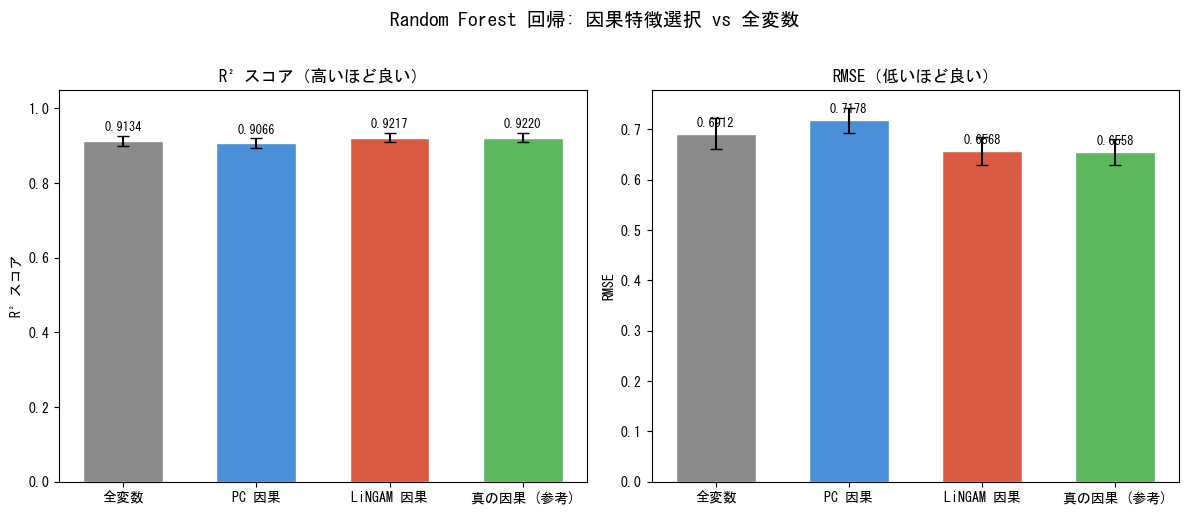

In [12]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["font.family"] = "MS Gothic"

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

models = results_df["モデル"]
x = np.arange(len(models))
width = 0.6

# --- R² ---
ax = axes[0]
colors = ["#8B8B8B", "#4A90D9", "#D95B43", "#5CB85C"]
bars = ax.bar(x, results_df["R² (mean)"], width, yerr=results_df["R² (std)"],
              color=colors, edgecolor="white", capsize=4)
ax.set_ylabel("R² スコア")
ax.set_title("R² スコア（高いほど良い）")
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.set_ylim(0, 1.05)
for bar, val in zip(bars, results_df["R² (mean)"]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
            f"{val:.4f}", ha="center", va="bottom", fontsize=9)

# --- RMSE ---
ax = axes[1]
bars = ax.bar(x, results_df["RMSE (mean)"], width, yerr=results_df["RMSE (std)"],
              color=colors, edgecolor="white", capsize=4)
ax.set_ylabel("RMSE")
ax.set_title("RMSE（低いほど良い）")
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
for bar, val in zip(bars, results_df["RMSE (mean)"]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
            f"{val:.4f}", ha="center", va="bottom", fontsize=9)

fig.suptitle("Random Forest 回帰: 因果特徴選択 vs 全変数", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()